In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/contentgdrive')
path = "/contentgdrive/MyDrive/"
     

Drive already mounted at /contentgdrive; to attempt to forcibly remount, call drive.mount("/contentgdrive", force_remount=True).


In [76]:
image = cv2.imread('coins.jpg')

# Convert the image to grayscale
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [77]:
blurred = cv2.GaussianBlur(gray, (9, 9), 2)
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_TRIANGLE)
canny = cv2.Canny(thresh, 0, ret, 3 )
# Perform morphological operations
dilation = cv2.dilate(canny , (2,2), iterations=2)
kernel = np.ones((3,3), np.uint8)
#opening = cv2.morphologyEx(canny, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE,(4,4))

22


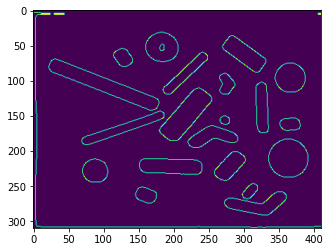

In [78]:
#contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
(contours, hierarchy) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, contours, -1, (0, 255, 0), 2)
# Print the number of objects in the image
print(len(contours))
plt.imshow(closing)

20


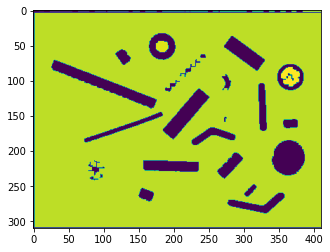

In [108]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('coins.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize the image
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Perform morphological operations to remove small objects and holes
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Find connected components
_, labels = cv2.connectedComponents(opening)

# Print the number of objects
print(labels.max())
plt.imshow(labels)


In [ ]:
                            +------------+
                            |  Read image |
                            +------------+
                                     |
                                     v
                            +----------------+
                            | Convert to gray |
                            +----------------+
                                     |
                                     v
                            +--------------+
                            |  Binarize    |
                            +--------------+
                                     |
                                     v
                            +--------------------+
                            | Perform opening    |
                            +--------------------+
                                     |
                                     v
                            +-------------------+
                            | Find connected    |
                            | components       


In [114]:
image = cv2.imread('eye_pupil.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize the image using Otsu's thresholding
threshold, binarized = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [115]:
# Convert the image to an edge map using Canny edge detection
edges = cv2.Canny(binarized, 128, 200)

# Perform the circular Hough transform
#circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,400,param1=50,param2=30,minRadius=0,maxRadius=0)

In [116]:
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)

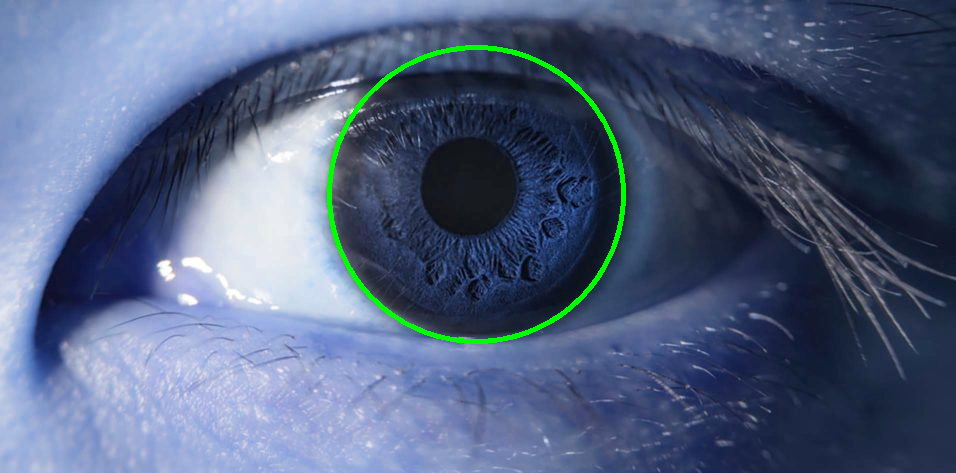

In [117]:
# Show the image
from google.colab.patches import cv2_imshow

im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2_imshow(im_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
                           +--------------------+
                           |  Create main window |
                           +--------------------+
                                     |
                                     v
                           +------------------------+
                           |  Create image canvas   |
                           +------------------------+
                                     |
                                     v
                           +----------------------------+
                           |  Create threshold slider   |
                           +----------------------------+
                                    
